In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [221]:
dfx = pd.read_csv('/Users/amritpalsingh/Downloads/Extra/iris.csv')


In [222]:
dataset = dfx.values
train_data = dataset[:30]
train_data = np.append(train_data,dataset[50:80],axis=0)
train_data = np.append(train_data,dataset[100:140],axis=0)

test_data = dataset[30:50,]
test_data = np.append(test_data,dataset[80:100,],axis=0)
test_data = np.append(test_data,dataset[140:150,],axis=0)

true_values = test_data[:,-1]
test_data = test_data[:,:4]

In [223]:
def get_distance(row1, row2):
    dis = 0.0
    for i in range(len(row1)-1):
        dis+=(row1[i] - row2[i])**2
    return sqrt(dis)

In [224]:
def get_neighbours(data , test_row , k):
    distances=[]
    for i in data:
        dis = get_distance(test_row, i)
        distances.append((i,dis))
    distances.sort(key = lambda x: x[1])
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours
    

In [225]:
def knn(train_data , test_row , k):
    neighbours = get_neighbours(train_data , test_row,k)
    output_values = [row[-1] for row in neighbours]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
    

In [229]:
X = []
Y = []
for j in range(1,101):
    count = 0
    X.append(j)
    for i in range (len(test_data)):
        res = knn(train_data , test_data[i] ,j)
        if true_values[i]== res:
            count+=1
    Y.append(count/len(test_data)*100)


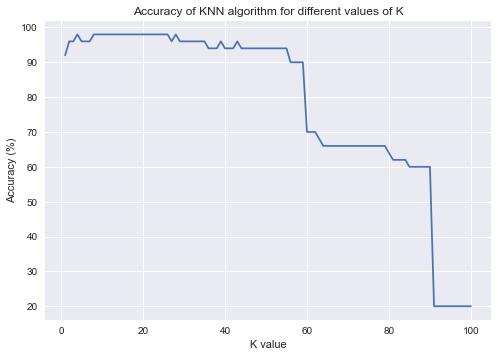

In [230]:
plt.plot(X,Y)
plt.title('Accuracy of KNN algorithm for different values of K')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.show()